In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_feather('mined_data.feather')

df.drop(['order_id', 'days_since_prior_order', 
         'order_number', 'order_dow', 'order_hour_of_day',
         'reordered', 'product_name', 'days_since_user_first_order'], axis=1, inplace=True)

# Removing initial product orders
df = df[df['days_since_user_ordered_product'] >= 0]

df['reordered_within_30_days'] = (df['days_since_user_ordered_product'] <= 30).astype(int)
df.drop(['days_since_user_ordered_product'], axis=1, inplace=True)

X = df.drop('reordered_within_30_days', axis=1)
y = df['reordered_within_30_days']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=62)


## Logistic Regression (for 30-day target)

In [2]:

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score

# Had to use a pipeline with a scaler because of memory issues. (I ran out)
lg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000))
])

lg_pipeline.fit(X_train, y_train)

y_pred = lg_pipeline.predict(X_test)

# Gets the probability rather than a 1 or 0
y_prob = lg_pipeline.predict_proba(X_test)[:, 1]

print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))


Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.58      0.05      0.10   1014460
           1       0.74      0.99      0.85   2810848

    accuracy                           0.74   3825308
   macro avg       0.66      0.52      0.47   3825308
weighted avg       0.70      0.74      0.65   3825308

ROC AUC: 0.617551607916526


In [3]:
import pickle

with open('lg_30_probs.pkl', 'wb') as f:
    pickle.dump(y_prob, f)

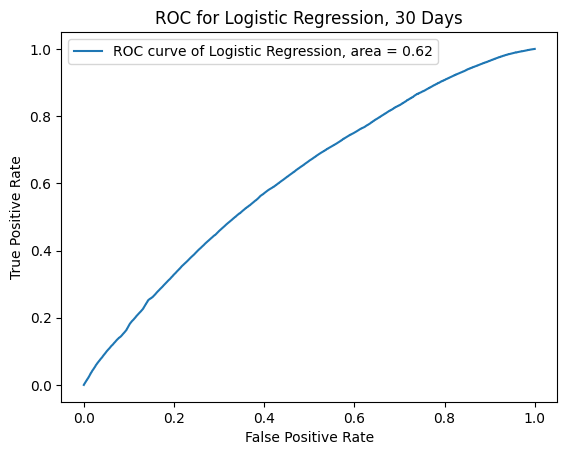

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

false_pos, true_pos, _ = roc_curve(y_test, y_prob)
roc_auc = auc(false_pos, true_pos)

plt.plot(false_pos, true_pos, label='ROC curve of Logistic Regression, area = %0.2f' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC for Logistic Regression, 30 Days')
plt.show()

# 14 Days

The accuracy was decent for 30 days, but what about 14 days?

(Same code as before, just changed one or two lines to classify for 14 days instead of 30)

In [5]:
# It was easier just to reload the data.

import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_feather('mined_data.feather')

df.drop(['order_id', 'days_since_prior_order', 
         'order_number', 'order_dow', 'order_hour_of_day',
         'reordered', 'product_name', 'days_since_user_first_order'], axis=1, inplace=True)

df = df[df['days_since_user_ordered_product'] >= 0]

df['reordered_within_14_days'] = (df['days_since_user_ordered_product'] <= 14).astype(int) # CHANGED LINE
df.drop(['days_since_user_ordered_product'], axis=1, inplace=True)

X = df.drop('reordered_within_14_days', axis=1)
y = df['reordered_within_14_days']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=62)

In [6]:
lg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000))
])

lg_pipeline.fit(X_train, y_train)

y_pred = lg_pipeline.predict(X_test)

y_prob = lg_pipeline.predict_proba(X_test)[:, 1]

print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.59      0.69      0.63   2046126
           1       0.55      0.44      0.49   1779182

    accuracy                           0.58   3825308
   macro avg       0.57      0.57      0.56   3825308
weighted avg       0.57      0.58      0.57   3825308

ROC AUC: 0.6008091218499316


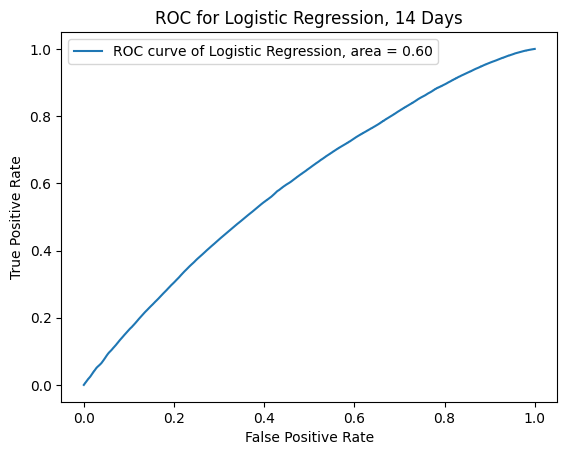

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

false_pos, true_pos, _ = roc_curve(y_test, y_prob)
roc_auc = auc(false_pos, true_pos)

plt.plot(false_pos, true_pos, label='ROC curve of Logistic Regression, area = %0.2f' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC for Logistic Regression, 14 Days')
plt.show()

In [8]:
with open('lg_14_probs.pkl', 'wb') as f:
    pickle.dump(y_prob, f)